In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.express as px

In [2]:
angus = pd.read_csv('simulated_dataNEw.csv')
angus.head()

,Unnamed: 0,Cow,Date,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
0,0,Cow 1,2022-01-01,391.030076,15.097939,25.130865
1,1,Cow 1,2022-01-02,497.429880,25.603158,37.378380
2,2,Cow 1,2022-01-03,383.263409,24.392390,61.928021
3,3,Cow 1,2022-01-04,420.832973,13.501311,53.642013
4,4,Cow 1,2022-01-05,460.102113,17.936188,52.433684


In [3]:
angus.drop('Unnamed: 0', axis=1, inplace=True)
angus.head()

,Cow,Date,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
0,Cow 1,2022-01-01,391.030076,15.097939,25.130865
1,Cow 1,2022-01-02,497.429880,25.603158,37.378380
2,Cow 1,2022-01-03,383.263409,24.392390,61.928021
3,Cow 1,2022-01-04,420.832973,13.501311,53.642013
4,Cow 1,2022-01-05,460.102113,17.936188,52.433684


In [4]:
angus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cow                        3600 non-null   object 
 1   Date                       3600 non-null   object 
 2   Body Weight (kg)           3600 non-null   float64
 3   Daily Hay Dry matter (kg)  3600 non-null   float64
 4   hay intake fresh           3600 non-null   float64
dtypes: float64(3), object(2)
memory usage: 140.8+ KB


In [5]:
angus['Date'] = pd.to_datetime(angus['Date']) # Convert 'Date' column to datetime format

In [6]:
angus = angus.set_index('Date')
angus.head()

,Cow,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
Date,,,,
2022-01-01,Cow 1,391.030076,15.097939,25.130865
2022-01-02,Cow 1,497.429880,25.603158,37.378380
2022-01-03,Cow 1,383.263409,24.392390,61.928021
2022-01-04,Cow 1,420.832973,13.501311,53.642013
2022-01-05,Cow 1,460.102113,17.936188,52.433684


In [7]:
df = angus.copy()
df.head()

,Cow,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
Date,,,,
2022-01-01,Cow 1,391.030076,15.097939,25.130865
2022-01-02,Cow 1,497.429880,25.603158,37.378380
2022-01-03,Cow 1,383.263409,24.392390,61.928021
2022-01-04,Cow 1,420.832973,13.501311,53.642013
2022-01-05,Cow 1,460.102113,17.936188,52.433684


In [8]:
df.sort_index(inplace=True) ######

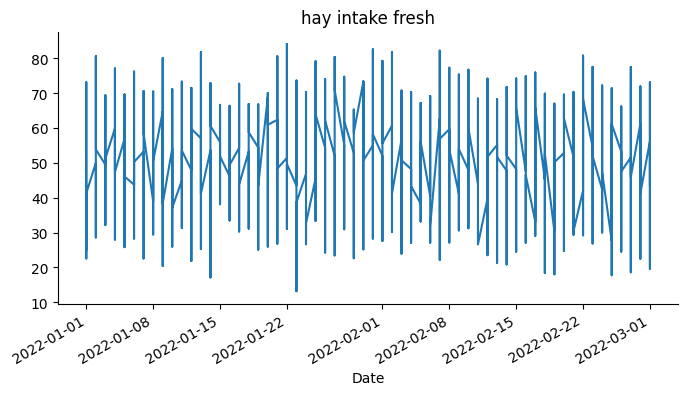

In [9]:
from matplotlib import pyplot as plt
df['hay intake fresh'].plot(kind='line', figsize=(8, 4), title='hay intake fresh')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
angus.duplicated().sum()

0

In [11]:
angus.isnull().sum()

Cow                          0
Body Weight (kg)             0
Daily Hay Dry matter (kg)    0
hay intake fresh             0
dtype: int64

In [12]:
df

,Cow,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
Date,,,,
2022-01-01,Cow 1,391.030076,15.097939,25.130865
2022-01-01,Cow 29,504.876349,20.994119,52.274337
2022-01-01,Cow 28,521.898657,15.705035,39.507894
2022-01-01,Cow 27,493.685601,20.126028,50.256942
2022-01-01,Cow 26,293.205468,14.881965,70.755381
...,...,...,...,...
2022-03-01,Cow 34,337.809017,25.262658,59.226778
2022-03-01,Cow 33,333.755668,16.433129,60.950250
2022-03-01,Cow 32,559.630644,23.828237,42.431231


In [13]:
df_train = df[0:-1500]
df_train

,Cow,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
Date,,,,
2022-01-01,Cow 1,391.030076,15.097939,25.130865
2022-01-01,Cow 29,504.876349,20.994119,52.274337
2022-01-01,Cow 28,521.898657,15.705035,39.507894
2022-01-01,Cow 27,493.685601,20.126028,50.256942
2022-01-01,Cow 26,293.205468,14.881965,70.755381
...,...,...,...,...
2022-02-04,Cow 18,487.973873,17.683868,40.964428
2022-02-04,Cow 3,485.447148,23.438484,38.249207
2022-02-04,Cow 32,568.298934,18.195127,64.334389


In [14]:
df_test = df[-1500:]
df_test

,Cow,Body Weight (kg),Daily Hay Dry matter (kg),hay intake fresh
Date,,,,
2022-02-05,Cow 57,439.424542,16.177847,38.307715
2022-02-05,Cow 51,357.208080,24.195544,41.101711
2022-02-05,Cow 20,426.850085,20.740481,51.527239
2022-02-05,Cow 3,390.986524,29.331988,34.435898
2022-02-05,Cow 30,526.248336,20.011828,46.980385
...,...,...,...,...
2022-03-01,Cow 34,337.809017,25.262658,59.226778
2022-03-01,Cow 33,333.755668,16.433129,60.950250
2022-03-01,Cow 32,559.630644,23.828237,42.431231


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [17]:
forecast_results = pd.DataFrame(columns=['Date', 'Cow', 'Predicted Body Weight (kg)'])

# Define the date to split the data (adjust the date as needed)
split_date = pd.to_datetime('2022-02-15')

# Extract unique cow IDs from the DataFrame
unique_cows = df['Cow'].unique()

# Continue with the forecasting logic
for cow in unique_cows:
    cow_data = df[df['Cow'] == cow]

    # Ensure that the index is a DatetimeIndex
    cow_data.index = pd.to_datetime(cow_data.index)

    # Split the data into train and test based on the split_date
    cow_train_data = cow_data[cow_data.index < split_date]
    cow_test_data = cow_data[cow_data.index >= split_date]

    # Fit the model and make predictions
    model_ETS = ETSModel(cow_train_data['Body Weight (kg)'], error='add', trend=None, seasonal=None)
    model_fit = model_ETS.fit()

    # Make predictions for the test set
    cow_predictions = model_fit.predict(start=len(cow_train_data), end=len(cow_train_data) + len(cow_test_data) - 1)

    # Store the predictions
    cow_forecast_df = pd.DataFrame({
        'Date': cow_test_data.index,
        'Cow': cow,
        'Predicted Body Weight (kg)': cow_predictions
    })

    forecast_results = pd.concat([forecast_results, cow_forecast_df])

forecast_results.reset_index(drop=True, inplace=True)
print(forecast_results)

d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolin

          Date     Cow  Predicted Body Weight (kg)
0   2022-02-15   Cow 1                  430.036713
1   2022-02-16   Cow 1                  430.036713
2   2022-02-17   Cow 1                  430.036713
3   2022-02-18   Cow 1                  430.036713
4   2022-02-19   Cow 1                  430.036713
..         ...     ...                         ...
895 2022-02-25  Cow 60                  456.172075
896 2022-02-26  Cow 60                  456.172075
897 2022-02-27  Cow 60                  456.172075
898 2022-02-28  Cow 60                  456.172075
899 2022-03-01  Cow 60                  456.172075

[900 rows x 3 columns]


d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Angus_Issues\NorthCarolin

In [18]:
print(model_fit.summary())

                                 ETS Results                                  
Dep. Variable:       Body Weight (kg)   No. Observations:                   45
Model:                       ETS(ANN)   Log Likelihood                -273.457
Date:                Sun, 18 Aug 2024   AIC                            552.913
Time:                        10:59:53   BIC                            558.333
Sample:                    01-01-2022   HQIC                           554.934
                         - 02-14-2022   Scale                        11111.724
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
initial_level     456.1719     15.748     28.966      0.000     425.306     487.038
Ljung-Box (Q):                  

In [19]:
actual_values = []
predicted_values = []

for cow in unique_cows:
    cow_data = df[df['Cow'] == cow]

    # Split the data into train and test based on the split_date
    cow_test_data = cow_data[cow_data.index >= split_date]

    # Extract actual values for the test set
    actual_values.extend(cow_test_data['Body Weight (kg)'].values)

    # Extract predicted values for the test set from forecast_results
    cow_predictions = forecast_results[forecast_results['Cow'] == cow]['Predicted Body Weight (kg)'].values
    predicted_values.extend(cow_predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE for ETS Model: {rmse}")

RMSE for ETS Model: 103.4605447353742


In [20]:
#pip install mlflow

In [21]:
import mlflow
import mlflow.sklearn

In [22]:
#import dagshub
#dagshub.init(repo_owner='Omdena', repo_name='NorthCarolina_CameroonChapter_AngusIssues', mlflow=True)

In [25]:
import os
os.environ['MLFLOW_TRACKING_USERNAME'] ='p2kalita'
os.environ['MLFLOW_TRACKING_PASSWORD'] ='8de462b1221469eac5376fc1a0c71c6b73558f0e'
os.environ['MLFLOW_TRACKING_URI'] ='https://dagshub.com/Omdena/NorthCarolina_CameroonChapter_AngusIssues.mlflow'
os.environ['MLFLOW_TRACKING_TOKEN'] ='8de462b1221469eac5376fc1a0c71c6b73558f0e'


mlflow.set_experiment("ETS_model")
# Start an MLflow run
with mlflow.start_run(run_name="ETS_model"):
    # Log parameters for ETS model
    mlflow.log_param("error", "additive")
    mlflow.log_param("trend", "None")
    mlflow.log_param("seasonal", "None")

    # Log evaluation metrics
    mlflow.log_metric("RMSE", rmse)


2024/08/18 11:00:35 INFO mlflow.tracking.fluent: Experiment with name 'ETS_model' does not exist. Creating a new experiment.
2024/08/18 11:00:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run ETS_model at: https://dagshub.com/Omdena/NorthCarolina_CameroonChapter_AngusIssues.mlflow/#/experiments/5/runs/b45029dddae4421cac163a393922a441.
2024/08/18 11:00:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Omdena/NorthCarolina_CameroonChapter_AngusIssues.mlflow/#/experiments/5.
